# Import 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split


from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.pipeline import Pipeline
from sklearn.metrics import *

# EDA

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df_train = pd.read_csv('data/Train.csv')
df_train.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_test = pd.read_csv('data/Test.csv')

In [5]:
df_train.columns = df_train.columns.str.lower()

In [6]:
df_test.columns = df_test.columns.str.lower()

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 89 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   place_id x date                                      30557 non-null  object        
 1   date                                                 30557 non-null  datetime64[ns]
 2   place_id                                             30557 non-null  object        
 3   target                                               30557 non-null  float64       
 4   target_min                                           30557 non-null  float64       
 5   target_max                                           30557 non-null  float64       
 6   target_variance                                      30557 non-null  float64       
 7   target_count                                         30557 non-null  int64         
 

In [7]:
df_train['date'] = pd.to_datetime(df_train['date'])

In [8]:
df_test['date'] = pd.to_datetime(df_test['date'])

/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_30096/1145112096.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


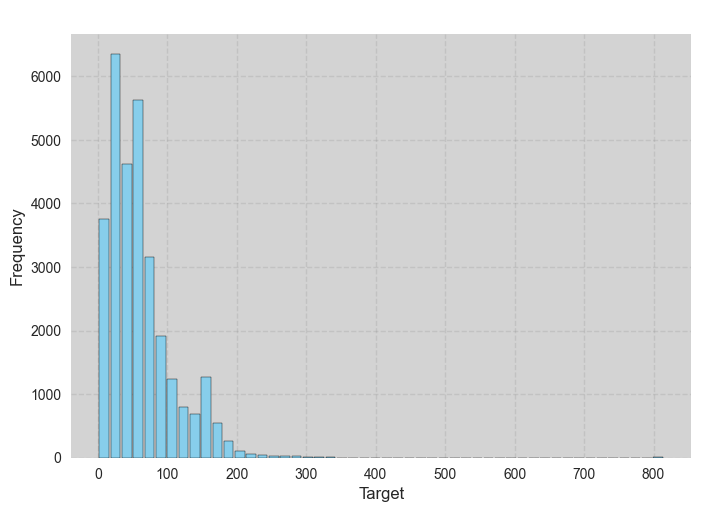

In [28]:
plt.hist(df_train['target'], bins=50, edgecolor='black', color='skyblue', rwidth=0.85)
plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
plt.title(' ', fontsize=16)
plt.xlabel('Target', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
#plt.savefig('figures/price_psqft_dist.png') 
plt.show()

/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_30096/2441951723.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


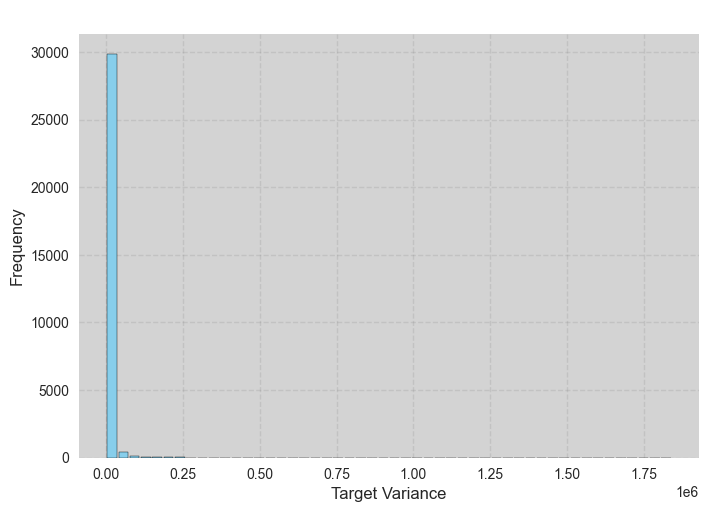

In [29]:
plt.hist(df_train['target_variance'], bins=50, edgecolor='black', color='skyblue', rwidth=0.85)
plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
plt.title(' ', fontsize=16)
plt.xlabel('Target Variance', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
#plt.savefig('figures/price_psqft_dist.png') 
plt.show()

In [12]:
# Remove the unwanted columns for the correlation matrix
df_corr = df_train.copy()
df_corr = df_corr.drop(['place_id x date', 'date', 'place_id'], axis=1)

In [13]:
correlation = df_corr.corr()['target']
corr_data = pd.DataFrame(correlation)
print(corr_data.sort_values(by='target', ascending=False).head(20))
print('------------------------------')
print(corr_data.sort_values(by='target', ascending=False).tail(20))


                                                   target
target                                           1.000000
target_min                                       0.818803
target_max                                       0.630801
l3_co_co_column_number_density                   0.375737
l3_hcho_tropospheric_hcho_column_number_density  0.347125
l3_hcho_hcho_slant_column_number_density         0.320849
l3_no2_no2_slant_column_number_density           0.315718
l3_no2_no2_column_number_density                 0.306772
l3_no2_tropospheric_no2_column_number_density    0.295380
target_variance                                  0.184818
l3_so2_absorbing_aerosol_index                   0.152000
l3_cloud_cloud_top_pressure                      0.123855
l3_cloud_cloud_base_pressure                     0.097343
target_count                                     0.094135
l3_ch4_aerosol_optical_depth                     0.086445
l3_ch4_ch4_column_volume_mixing_ratio_dry_air    0.075086
l3_ch4_aerosol

In [30]:
df_train.groupby(['place_id']).size().reset_index(name='Count')

,place_id,Count
0,010Q650,94
1,05EC30X,90
2,0DPWHX8,94
3,0GBXTHY,94
4,0HYPV1N,94
...,...,...
335,YLLOKEY,94
336,YLZOBFW,94
337,YPXSK14,94
338,YSIXKFZ,94


In [9]:
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day

df_test['year'] = df_test['date'].dt.year
df_test['month'] = df_test['date'].dt.month
df_test['day'] = df_test['date'].dt.day

In [10]:
df_train['log_target'] = np.log(df_train['target'])


In [11]:
df_train['log_target_min'] = np.log(df_train['target_min'])
df_train['log_target_max'] = np.log(df_train['target_max'])

/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_30096/94072448.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


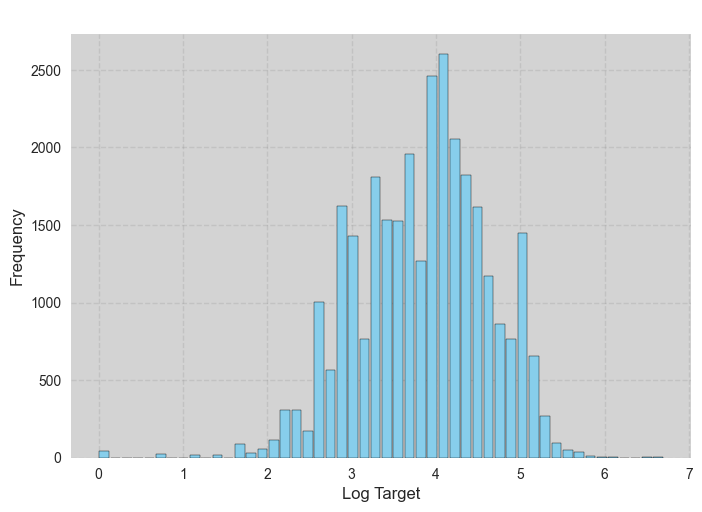

In [31]:
plt.hist(df_train['log_target'], bins=50, edgecolor='black', color='skyblue', rwidth=0.85)
plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
plt.title(' ', fontsize=16)
plt.xlabel('Log Target', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
#plt.savefig('figures/price_psqft_dist.png') 
plt.show()

/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_30096/170671060.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


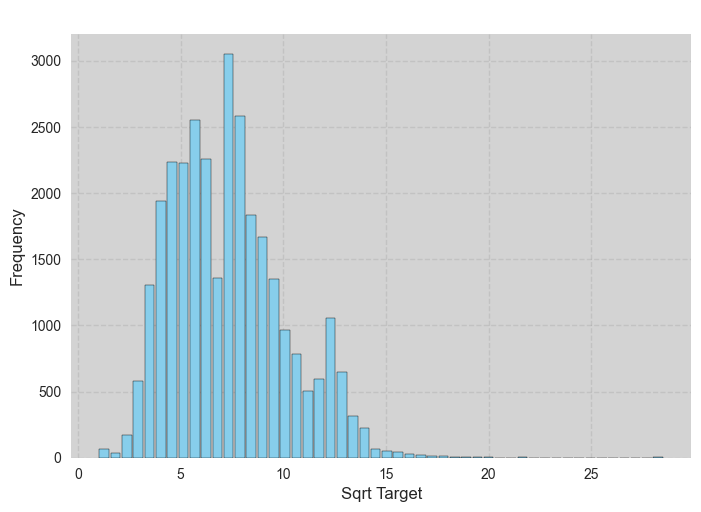

In [32]:
df_train['sqrt_target'] = np.sqrt(df_train['target'])

plt.hist(df_train['sqrt_target'], bins=50, edgecolor='black', color='skyblue', rwidth=0.85)
plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
plt.title(' ', fontsize=16)
plt.xlabel('Sqrt Target', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
#plt.savefig('figures/price_psqft_dist.png') 
plt.show()

In [33]:
#sns.histplot(x='target_max', y='target_min', data=df_train ,hue='target')
df_train['target'].unique()

array([ 38. ,  39. ,  24. ,  49. ,  21. ,  28. ,  18. ,  31. ,  25. ,
        29. ,  23. ,  40. ,  52. ,  60. ,  46. ,  53. ,  54. ,  34. ,
        45. ,  27. ,  15. ,  41. ,  42. ,  47. ,  22. ,  13. ,  50. ,
        57. ,  51. ,  16. ,  48. ,  44. ,  30. ,  36. ,  59. ,  32. ,
        20. ,  33. ,  43. ,  19. ,  58. ,  61. ,  72. ,  80. ,  17. ,
        55. ,  65. ,  70. ,  76. ,  73. , 117. , 128. , 119. , 101. ,
       115. ,  67. , 124. ,  75. , 131. , 157. , 138. , 161. , 152. ,
        66. ,  62. ,  83. ,  96. ,  81. ,  90. ,  95. ,  84. ,  78. ,
       130. ,  56. ,  93. ,  89. , 139. , 126. , 114. ,  88. , 112. ,
        91. ,  68. , 107. ,  98. ,  77. , 123. , 120. ,  82. ,  64. ,
        92. ,   8. ,  11. ,  10. ,  12. ,  37. ,  14. ,   9. ,  26. ,
         7. ,  87. ,  85. , 104. , 129. , 142. , 151. , 137. , 127. ,
        74. ,  97. , 149. , 109. ,  63. , 147. , 134. , 159. , 162. ,
        69. ,   5. ,   3. ,   2. ,  71. , 102. , 122. ,  99. , 132. ,
       158. , 164. ,

/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_30096/3242716794.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


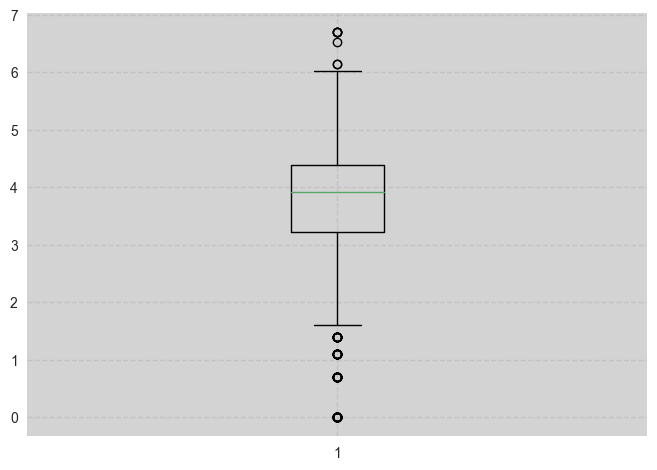

In [34]:
plt.boxplot(df_train['log_target'])
plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')
plt.grid(True, linestyle='--', alpha=0.2, color='gray')

plt.show()

# Checking for the null values and filling in the missing

In [35]:
#Null values percentages in columns 

null_count = df_train.isnull().sum()
total_rows = len(df_train)
null_percentage = (null_count / total_rows) * 100
null_info_df = pd.DataFrame({'Null Percentage': null_percentage})
null_info_df.reset_index(inplace=True)
print(null_info_df)

              index  Null Percentage
0   place_id x date              0.0
1              date              0.0
2          place_id              0.0
3            target              0.0
4        target_min              0.0
..              ...              ...
84              day              0.0
85       log_target              0.0
86   log_target_min              0.0
87   log_target_max              0.0
88      sqrt_target              0.0

[89 rows x 2 columns]


In [12]:
df_drop_train = df_train.drop(['place_id x date'], axis=1)

df_drop_test = df_test.drop(['place_id x date'], axis=1)

In [13]:
# Get the features list with null values 
columns_with_nan_train = df_train.columns[df_train.isnull().any()].tolist()

print(columns_with_nan_train)

['l3_no2_no2_column_number_density', 'l3_no2_no2_slant_column_number_density', 'l3_no2_absorbing_aerosol_index', 'l3_no2_cloud_fraction', 'l3_no2_sensor_altitude', 'l3_no2_sensor_azimuth_angle', 'l3_no2_sensor_zenith_angle', 'l3_no2_solar_azimuth_angle', 'l3_no2_solar_zenith_angle', 'l3_no2_stratospheric_no2_column_number_density', 'l3_no2_tropopause_pressure', 'l3_no2_tropospheric_no2_column_number_density', 'l3_o3_o3_column_number_density', 'l3_o3_o3_effective_temperature', 'l3_o3_cloud_fraction', 'l3_o3_sensor_azimuth_angle', 'l3_o3_sensor_zenith_angle', 'l3_o3_solar_azimuth_angle', 'l3_o3_solar_zenith_angle', 'l3_co_co_column_number_density', 'l3_co_h2o_column_number_density', 'l3_co_cloud_height', 'l3_co_sensor_altitude', 'l3_co_sensor_azimuth_angle', 'l3_co_sensor_zenith_angle', 'l3_co_solar_azimuth_angle', 'l3_co_solar_zenith_angle', 'l3_hcho_hcho_slant_column_number_density', 'l3_hcho_cloud_fraction', 'l3_hcho_sensor_azimuth_angle', 'l3_hcho_sensor_zenith_angle', 'l3_hcho_solar

In [14]:
# Inputing with place_id and month average

averages = df_drop_train.groupby(['place_id', 'month']).mean()

# Iterate over the columns with missing values
for col in columns_with_nan_train:
    # Fill missing values with the calculated averages
    df_drop_train[col] = df_drop_train.apply(lambda row: averages.loc[(row['place_id'], row['month']), col] if pd.isna(row[col]) else row[col], axis=1)

In [26]:
#Null values percentages in columns after inputing with place_id and month average

null_count = df_drop_train.isnull().sum()
total_rows = len(df_drop_train)
null_percentage = (null_count / total_rows) * 100
null_info_df = pd.DataFrame({'Null Percentage': null_percentage})
null_info_df.reset_index(inplace=True)
print(null_info_df)

                                                index  Null Percentage
0                                                date         0.000000
1                                            place_id         0.000000
2                                              target         0.000000
3                                          target_min         0.000000
4                                          target_max         0.000000
5                                     target_variance         0.000000
6                                        target_count         0.000000
7                precipitable_water_entire_atmosphere         0.000000
8                   relative_humidity_2m_above_ground         0.000000
9                   specific_humidity_2m_above_ground         0.000000
10                        temperature_2m_above_ground         0.000000
11               u_component_of_wind_10m_above_ground         0.000000
12               v_component_of_wind_10m_above_ground         0.000000
13    

In [15]:
# Get the features list with null values 

columns_with_nan_train_2 = df_drop_train.columns[df_drop_train.isnull().any()].tolist()

print(columns_with_nan_train_2)

['l3_no2_no2_column_number_density', 'l3_no2_no2_slant_column_number_density', 'l3_no2_absorbing_aerosol_index', 'l3_no2_cloud_fraction', 'l3_no2_sensor_altitude', 'l3_no2_sensor_azimuth_angle', 'l3_no2_sensor_zenith_angle', 'l3_no2_solar_azimuth_angle', 'l3_no2_solar_zenith_angle', 'l3_no2_stratospheric_no2_column_number_density', 'l3_no2_tropopause_pressure', 'l3_no2_tropospheric_no2_column_number_density', 'l3_o3_o3_column_number_density', 'l3_o3_o3_effective_temperature', 'l3_o3_cloud_fraction', 'l3_o3_sensor_azimuth_angle', 'l3_o3_sensor_zenith_angle', 'l3_o3_solar_azimuth_angle', 'l3_o3_solar_zenith_angle', 'l3_co_co_column_number_density', 'l3_co_h2o_column_number_density', 'l3_co_cloud_height', 'l3_co_sensor_altitude', 'l3_co_sensor_azimuth_angle', 'l3_co_sensor_zenith_angle', 'l3_co_solar_azimuth_angle', 'l3_co_solar_zenith_angle', 'l3_hcho_hcho_slant_column_number_density', 'l3_hcho_cloud_fraction', 'l3_hcho_sensor_azimuth_angle', 'l3_hcho_sensor_zenith_angle', 'l3_hcho_solar

In [16]:
# Inputing with place_id average
averages = df_drop_train.groupby(['place_id']).mean()

# Iterate over the columns with missing values
for col in columns_with_nan_train_2:
    # Fill missing values with the calculated averages
    df_drop_train[col] = df_drop_train.apply(lambda row: averages.loc[(row['place_id']), col] if pd.isna(row[col]) else row[col], axis=1)

In [29]:
#Null values percentages in columns after inputing with place_id average
null_count = df_drop_train.isnull().sum()
total_rows = len(df_drop_train)
null_percentage = (null_count / total_rows) * 100
null_info_df = pd.DataFrame({'Null Percentage': null_percentage})
null_info_df.reset_index(inplace=True)
print(null_info_df)

                                                index  Null Percentage
0                                                date         0.000000
1                                            place_id         0.000000
2                                              target         0.000000
3                                          target_min         0.000000
4                                          target_max         0.000000
5                                     target_variance         0.000000
6                                        target_count         0.000000
7                precipitable_water_entire_atmosphere         0.000000
8                   relative_humidity_2m_above_ground         0.000000
9                   specific_humidity_2m_above_ground         0.000000
10                        temperature_2m_above_ground         0.000000
11               u_component_of_wind_10m_above_ground         0.000000
12               v_component_of_wind_10m_above_ground         0.000000
13    

In [17]:
# Remain null data was 0.0091% thats dropped (3 rows)
df_drop_train = df_drop_train.dropna()

In [18]:
#Null values percentages in columns after inputing with place_id average
null_count = df_drop_train.isnull().sum()
total_rows = len(df_drop_train)
null_percentage = (null_count / total_rows) * 100
null_info_df = pd.DataFrame({'Null Percentage': null_percentage})
null_info_df.reset_index(inplace=True)
print(null_info_df)

             index  Null Percentage
0             date              0.0
1         place_id              0.0
2           target              0.0
3       target_min              0.0
4       target_max              0.0
..             ...              ...
82           month              0.0
83             day              0.0
84      log_target              0.0
85  log_target_min              0.0
86  log_target_max              0.0

[87 rows x 2 columns]


In [19]:
# Get the features list with null values 

columns_with_nan_test = df_test.columns[df_test.isnull().any()].tolist()

print(columns_with_nan_test)


['l3_no2_no2_column_number_density', 'l3_no2_no2_slant_column_number_density', 'l3_no2_absorbing_aerosol_index', 'l3_no2_cloud_fraction', 'l3_no2_sensor_altitude', 'l3_no2_sensor_azimuth_angle', 'l3_no2_sensor_zenith_angle', 'l3_no2_solar_azimuth_angle', 'l3_no2_solar_zenith_angle', 'l3_no2_stratospheric_no2_column_number_density', 'l3_no2_tropopause_pressure', 'l3_no2_tropospheric_no2_column_number_density', 'l3_o3_o3_column_number_density', 'l3_o3_o3_effective_temperature', 'l3_o3_cloud_fraction', 'l3_o3_sensor_azimuth_angle', 'l3_o3_sensor_zenith_angle', 'l3_o3_solar_azimuth_angle', 'l3_o3_solar_zenith_angle', 'l3_co_co_column_number_density', 'l3_co_h2o_column_number_density', 'l3_co_cloud_height', 'l3_co_sensor_altitude', 'l3_co_sensor_azimuth_angle', 'l3_co_sensor_zenith_angle', 'l3_co_solar_azimuth_angle', 'l3_co_solar_zenith_angle', 'l3_hcho_hcho_slant_column_number_density', 'l3_hcho_cloud_fraction', 'l3_hcho_sensor_azimuth_angle', 'l3_hcho_sensor_zenith_angle', 'l3_hcho_solar

In [20]:
# Inputing with place_id and month average

averages = df_drop_test.groupby(['place_id', 'month']).mean()

# Iterate over the columns with missing values
for col in columns_with_nan_test:
    # Fill missing values with the calculated averages
    df_drop_test[col] = df_drop_test.apply(lambda row: averages.loc[(row['place_id'], row['month']), col] if pd.isna(row[col]) else row[col], axis=1)

In [34]:
#Null values percentages in columns after inputing with place_id and month average
null_count = df_drop_test.isnull().sum()
total_rows = len(df_drop_test)
null_percentage = (null_count / total_rows) * 100
null_info_df = pd.DataFrame({'Null Percentage': null_percentage})
null_info_df.reset_index(inplace=True)
print(null_info_df)

                                                index  Null Percentage
0                                                date         0.000000
1                                            place_id         0.000000
2                precipitable_water_entire_atmosphere         0.000000
3                   relative_humidity_2m_above_ground         0.000000
4                   specific_humidity_2m_above_ground         0.000000
5                         temperature_2m_above_ground         0.000000
6                u_component_of_wind_10m_above_ground         0.000000
7                v_component_of_wind_10m_above_ground         0.000000
8                    l3_no2_no2_column_number_density         0.185920
9              l3_no2_no2_slant_column_number_density         0.185920
10                     l3_no2_absorbing_aerosol_index         0.185920
11                              l3_no2_cloud_fraction         0.185920
12                             l3_no2_sensor_altitude         0.185920
13    

In [21]:
# Get the features list with null values 
columns_with_nan_test_2 = df_test.columns[df_test.isnull().any()].tolist()

print(columns_with_nan_test_2)

['l3_no2_no2_column_number_density', 'l3_no2_no2_slant_column_number_density', 'l3_no2_absorbing_aerosol_index', 'l3_no2_cloud_fraction', 'l3_no2_sensor_altitude', 'l3_no2_sensor_azimuth_angle', 'l3_no2_sensor_zenith_angle', 'l3_no2_solar_azimuth_angle', 'l3_no2_solar_zenith_angle', 'l3_no2_stratospheric_no2_column_number_density', 'l3_no2_tropopause_pressure', 'l3_no2_tropospheric_no2_column_number_density', 'l3_o3_o3_column_number_density', 'l3_o3_o3_effective_temperature', 'l3_o3_cloud_fraction', 'l3_o3_sensor_azimuth_angle', 'l3_o3_sensor_zenith_angle', 'l3_o3_solar_azimuth_angle', 'l3_o3_solar_zenith_angle', 'l3_co_co_column_number_density', 'l3_co_h2o_column_number_density', 'l3_co_cloud_height', 'l3_co_sensor_altitude', 'l3_co_sensor_azimuth_angle', 'l3_co_sensor_zenith_angle', 'l3_co_solar_azimuth_angle', 'l3_co_solar_zenith_angle', 'l3_hcho_hcho_slant_column_number_density', 'l3_hcho_cloud_fraction', 'l3_hcho_sensor_azimuth_angle', 'l3_hcho_sensor_zenith_angle', 'l3_hcho_solar

In [22]:
# Inputing with place_id average

averages = df_drop_test.groupby(['place_id']).mean()

# Iterate over the columns with missing values
for col in columns_with_nan_test_2:
    # Fill missing values with the calculated averages
    df_drop_test[col] = df_drop_test.apply(lambda row: averages.loc[(row['place_id']), col] if pd.isna(row[col]) else row[col], axis=1)

In [37]:
#Null values percentages in columns after inputing with place_id average

null_count = df_drop_test.isnull().sum()
total_rows = len(df_drop_test)
null_percentage = (null_count / total_rows) * 100
null_info_df = pd.DataFrame({'Null Percentage': null_percentage})
null_info_df.reset_index(inplace=True)
print(null_info_df)

                                                index  Null Percentage
0                                                date              0.0
1                                            place_id              0.0
2                precipitable_water_entire_atmosphere              0.0
3                   relative_humidity_2m_above_ground              0.0
4                   specific_humidity_2m_above_ground              0.0
5                         temperature_2m_above_ground              0.0
6                u_component_of_wind_10m_above_ground              0.0
7                v_component_of_wind_10m_above_ground              0.0
8                    l3_no2_no2_column_number_density              0.0
9              l3_no2_no2_slant_column_number_density              0.0
10                     l3_no2_absorbing_aerosol_index              0.0
11                              l3_no2_cloud_fraction              0.0
12                             l3_no2_sensor_altitude              0.0
13    

In [36]:
df_drop_train.columns

Index(['date', 'place_id', 'target', 'target_min', 'target_max',
       'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'l3_no2_no2_column_number_density',
       'l3_no2_no2_slant_column_number_density',
       'l3_no2_absorbing_aerosol_index', 'l3_no2_cloud_fraction',
       'l3_no2_sensor_altitude', 'l3_no2_sensor_azimuth_angle',
       'l3_no2_sensor_zenith_angle', 'l3_no2_solar_azimuth_angle',
       'l3_no2_solar_zenith_angle',
       'l3_no2_stratospheric_no2_column_number_density',
       'l3_no2_tropopause_pressure',
       'l3_no2_tropospheric_no2_column_number_density',
       'l3_o3_o3_column_number_density', 'l3_o3_o3_effective_temperature',
       'l3_o3_cloud_fraction', 'l3_o3_sensor_azimuth_angle',
       'l3_o3_sensor_z

## Define Feature and Target, Train,Test Split

In [40]:
# Define target and features 

y = df_drop_train['log_target']
X= df_drop_train.drop(['date','target', 'target_min', 'target_max','target_variance', 'target_count','log_target', 'log_target_min', 'log_target_max','year'],axis=1)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21387, 77), (9167, 77), (21387,), (9167,))

In [43]:
X_train['place_id'].nunique()

339

In [44]:
# Create dummy variables for specific columns in the training set
X_train = pd.get_dummies(X_train, columns=['month','day'])

# Create dummy variables for the same columns in the testing set
X_test = pd.get_dummies(X_test, columns=['month','day'])


In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21387, 448), (9167, 448), (21387,), (9167,))

## Linear Regression

In [46]:
lin_reg = LinearRegression()

In [47]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = lin_reg.predict(X_test)

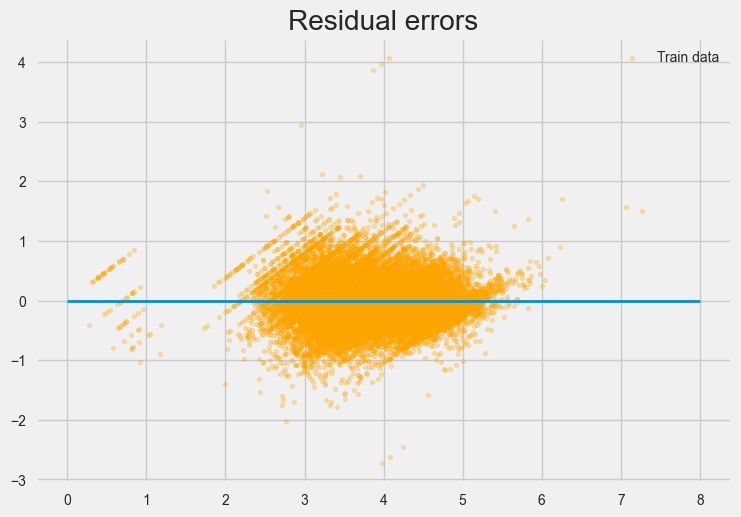

In [49]:
plt.style.use('fivethirtyeight')
 
# plotting residual errors in training data
plt.scatter(lin_reg.predict(X_train),
            lin_reg.predict(X_train) - y_train,
            color="orange", s=10,
            label='Train data',alpha=0.3)
 
# plotting residual errors in test data
#plt.scatter(y_pred,
            #y_pred - y_test,
            #color="blue", s=10,
            #label='Test data',alpha=0.5)
 
# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=8, linewidth=2)
 
# plotting legend
plt.legend(loc='upper right')
 
# plot title
plt.title("Residual errors")
 
# method call for showing the plot
plt.show()

/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_30096/2579762598.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


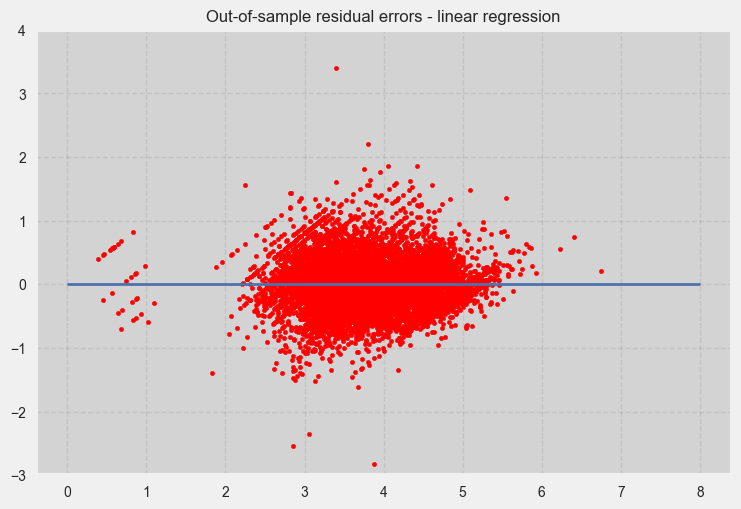

In [50]:
plt.style.use('fivethirtyeight')
plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
 
# plotting residual errors in test data
plt.scatter(lin_reg.predict(X_test),
            lin_reg.predict(X_test) - y_test,
            color="red", s=10)


plt.hlines(y=0, xmin=0, xmax=8, linewidth=2)
plt.ylim(-3, 4)
plt.legend(loc='upper right')
plt.title("Out-of-sample residual errors - linear regression")
plt.show()

In [51]:
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.3f}")
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.3f}")
r_2 = r2_score(y_test, y_pred)
print(f"R^2: {r_2:.3f}")

p = X_train.shape[1]
n = len(y_test)  # Number of samples
adjusted_r2 = 1 - (1 - r_2) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2: {adjusted_r2:.3f}")

MSE: 0.167
RMSE: 0.409
R^2: 0.725
Adjusted R^2: 0.711


## Lasso Regression

In [77]:
lasso = Lasso(alpha=0.5, max_iter=int(10e5))
lasso.fit(X_train,y_train)

Lasso(alpha=0.5, max_iter=1000000)

In [78]:
y_pred_lasso = lasso.predict(X_test)

In [128]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"MSE: {mse_lasso:.3f}")
rmse_lasso = np.sqrt(mse_lasso)
print(f"RMSE: {rmse_lasso:.3f}")
r_2 = r2_score(y_test, y_pred_lasso)
print(f"R^2: {r_2:.3f}")

p = X_train.shape[1]
n = len(y_test)  # Number of samples
adjusted_r2_lasso = 1 - (1 - r_2) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2: {adjusted_r2_lasso:.3f}")

MSE: 0.488
RMSE: 0.699
R^2: 0.199
Adjusted R^2: 0.158


In [91]:
coefficients_1 = lasso.coef_
# Create a list of selected variables based on non-zero coefficients
selected_variables_1 = [var for coef, var in zip(coefficients_1, X_train.columns) if coef != 0]

# Print the selected variables in Model 1
print("Selected Variables in Model 1:", selected_variables_1)

#Print number of features Lasso uses
def coeff_info(model, total_features):
    coeff_used = np.sum(model.coef_ != 0)
    print('The model is using', coeff_used, 'out of', total_features, 'features.')
    print("The highest coefficient has a value of:", max(model.coef_.round(3)))
    
coeff_info(lasso, total_features=X_train.shape[1])

Selected Variables in Model 1: ['relative_humidity_2m_above_ground', 'temperature_2m_above_ground', 'l3_no2_sensor_altitude', 'l3_no2_tropopause_pressure', 'l3_co_h2o_column_number_density', 'l3_co_cloud_height', 'l3_co_sensor_altitude', 'l3_co_solar_azimuth_angle', 'l3_cloud_cloud_base_height', 'l3_cloud_cloud_base_pressure', 'l3_cloud_cloud_optical_depth', 'l3_cloud_cloud_top_height', 'l3_cloud_cloud_top_pressure', 'l3_cloud_solar_azimuth_angle', 'l3_aer_ai_sensor_altitude', 'l3_aer_ai_sensor_azimuth_angle', 'l3_so2_sensor_azimuth_angle', 'l3_so2_solar_azimuth_angle', 'l3_ch4_ch4_column_volume_mixing_ratio_dry_air', 'l3_ch4_aerosol_height']
The model is using 20 out of 448 features.
The highest coefficient has a value of: 0.001


## Ridge Regression

In [93]:
alpha = 1.0  # Regularization strength (hyperparameter); you can adjust this value

ridge_model = Ridge(alpha=alpha)

ridge_model.fit(X_train, y_train)

Ridge()

In [95]:
y_pred_ridge = ridge_model.predict(X_test)

In [127]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"MSE: {mse_ridge:.3f}")
rmse_ridge = np.sqrt(mse_ridge)
print(f"RMSE: {rmse_ridge:.3f}")
r_2 = r2_score(y_test, y_pred_ridge)
print(f"R^2: {r_2:.3f}")

p = X_train.shape[1]
n = len(y_test)  # Number of samples
adjusted_r2_ridge = 1 - (1 - r_2) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2: {adjusted_r2_ridge:.3f}")

MSE: 0.176
RMSE: 0.420
R^2: 0.711
Adjusted R^2: 0.697


## Random Forest Regressor

In [109]:
random_regr = RandomForestRegressor(n_estimators=1000, max_depth=4,min_samples_leaf=20 ,max_samples=0.2 ,random_state=42, n_jobs=-1)

random_regr.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, max_samples=0.2, min_samples_leaf=20,
                      n_estimators=1000, n_jobs=-1, random_state=42)

In [110]:
y_pred_randfor = random_regr.predict(X_test)

In [126]:
mse_randfor = mean_squared_error(y_test, y_pred_randfor)
print(f"MSE: {mse_randfor:.3f}")
rmse_randfor = np.sqrt(mse_randfor)
print(f"RMSE: {rmse_ridge:.3f}")
r_2 = r2_score(y_test, y_pred_randfor)
print(f"R^2: {r_2:.3f}")

p = X_train.shape[1]
n = len(y_test)  # Number of samples
adjusted_r2_randfor = 1 - (1 - r_2) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2: {adjusted_r2_randfor:.3f}")

MSE: 0.383
RMSE: 0.420
R^2: 0.371
Adjusted R^2: 0.339


## Extra Tree Regressor

In [122]:
extra_tree = ExtraTreesRegressor(n_estimators=500, random_state=42)
extra_tree.fit(X_train, y_train)

extra_tree.score(X_test, y_test)

0.7629775543573087

In [123]:
y_pred_extree = extra_tree.predict(X_test)

In [ ]:
# Get feature importances from the trained model
feature_importances = extra_tree.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_10_features = feature_importance_df.head(10)
print(top_10_features)

plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.gca().invert_yaxis()  
plt.show()

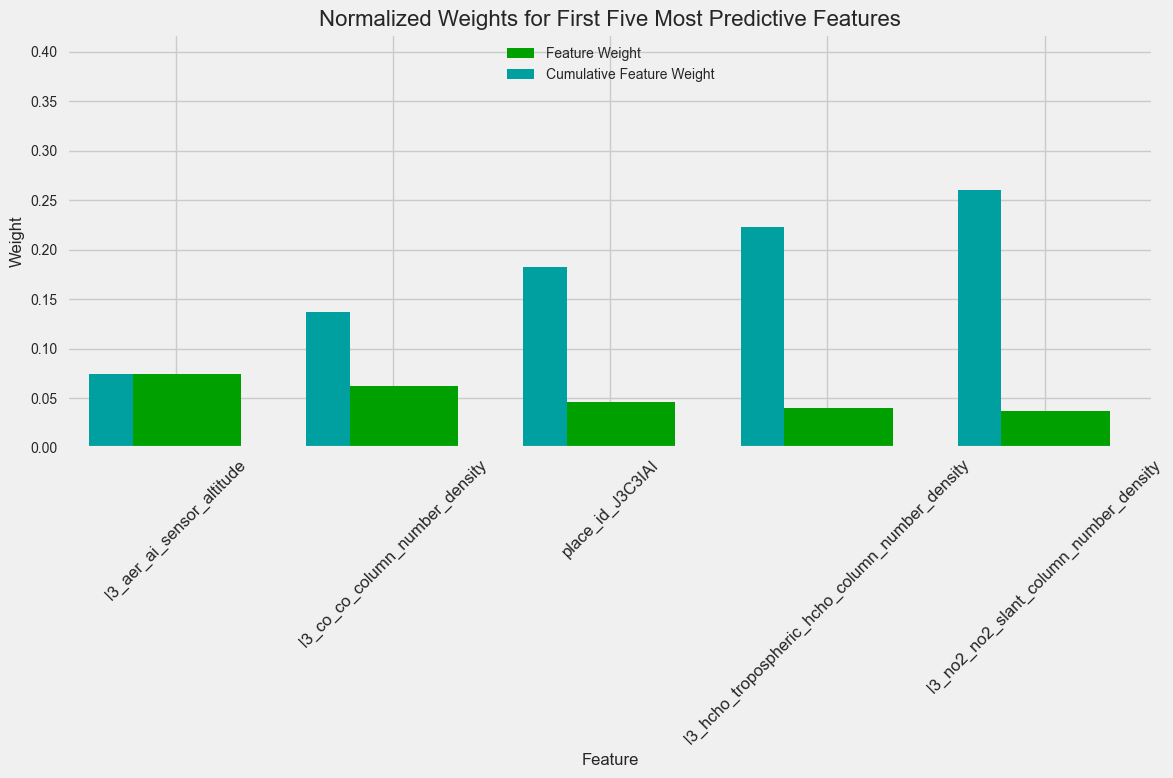

In [160]:
def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:10]]
    values = importances[indices][:10]

    # Creat the plot
    fig = plt.figure(figsize = (12,8))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(10), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(10) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(10), columns, rotation=45, fontsize=12)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    

    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()  

imp_features = extra_tree.feature_importances_


# Plot
feature_plot(imp_features, X_train, y_train)

### Based on the feature names and their corresponding importance scores in the table you provided, it appears that you are working with a machine learning model for environmental or atmospheric data. Here's an interpretation of the top 10 features:

- l3_aer_ai_sensor_altitude: This feature might represent the altitude information related to a sensor measuring aerosol concentration or properties in the atmosphere.
- l3_co_co_column_number_density: This feature could represent the column number density of carbon monoxide (CO) in the atmosphere.
- place_id_J3C3IAI: This seems to be a categorical feature related to a specific place or location, possibly encoded as a label or identifier.
- l3_hcho_tropospheric_hcho_column_number_density: This feature could represent the tropospheric column number density of formaldehyde (HCHO) in the atmosphere.
- l3_no2_no2_slant_column_number_density: This feature may represent the slant column number density of nitrogen dioxide (NO2) in the atmosphere.
- u_component_of_wind_10m_above_ground: This feature likely represents the east-west component of wind velocity at a height of 10 meters above the ground.
- l3_hcho_hcho_slant_column_number_density: This feature may represent the slant column number density of formaldehyde (HCHO) in the atmosphere, similar to feature #4 but possibly using a different measurement method or altitude.
- v_component_of_wind_10m_above_ground: This feature likely represents the north-south component of wind velocity at a height of 10 meters above the ground.
- l3_no2_tropospheric_no2_column_number_density: This feature could represent the tropospheric column number density of nitrogen dioxide (NO2) in the atmosphere, similar to feature #5 but possibly considering the troposphere.
- l3_no2_no2_column_number_density: This feature may represent the column number density of nitrogen dioxide (NO2) in the atmosphere, similar to feature #5 but possibly considering the entire column of the atmosphere.


In [125]:
mse_extree = mean_squared_error(y_test, y_pred_extree)
print(f"MSE: {mse_extree:.3f}")
rmse_extree = np.sqrt(mse_extree)
print(f"RMSE: {rmse_ridge:.3f}")
r_2 = r2_score(y_test, y_pred_extree)
print(f"R^2: {r_2:.3f}")

p = X_train.shape[1]
n = len(y_test)  # Number of samples
adjusted_r2_extree = 1 - (1 - r_2) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2: {adjusted_r2_extree:.3f}")

MSE: 0.145
RMSE: 0.420
R^2: 0.763
Adjusted R^2: 0.751


In [ ]:
plt.style.use('fivethirtyeight')
plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
 
# plotting residual errors in test data
plt.scatter(extra_tree.predict(X_train),
            extra_tree.predict(X_train) - y_train,
            color="red", s=10)


plt.hlines(y=0, xmin=0, xmax=8, linewidth=2)
plt.ylim(-3, 4)
plt.legend(loc='upper right')
plt.title("In-sample residual errors - extra trees regressor")
plt.show()

In [ ]:
plt.style.use('fivethirtyeight')
plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
 
# plotting residual errors in test data
plt.scatter(extra_tree.predict(X_test),
            extra_tree.predict(X_test) - y_test,
            color="red", s=10)


plt.hlines(y=0, xmin=0, xmax=8, linewidth=2)
plt.ylim(-3, 4)
plt.legend(loc='upper right')
plt.title("Out-of-sample residual errors - extra trees regressor")
plt.show()

## KNN Regression

In [170]:
knn = KNeighborsRegressor(n_neighbors=21)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

In [171]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"MSE: {mse_knn:.3f}")
rmse_knn = np.sqrt(mse_knn)
print(f"RMSE: {rmse_knn:.3f}")
r_2 = r2_score(y_test, y_pred_knn)
print(f"R^2: {r_2:.3f}")

p = X_train.shape[1]
n = len(y_test)  # Number of samples
adjusted_r2_knn = 1 - (1 - r_2) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2: {adjusted_r2_knn:.3f}")

MSE: 0.470
RMSE: 0.685
R^2: 0.230
Adjusted R^2: 0.190


## Gradient Boosting Regressor

In [172]:
gbrt = GradientBoostingRegressor(max_depth=20, n_estimators=500, learning_rate=1.0)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=20, n_estimators=500)

In [173]:
y_pred_gbrt= gbrt.predict(X_test)

In [174]:
mse_gbrt = mean_squared_error(y_test, y_pred_gbrt)
print(f"MSE: {mse_gbrt:.3f}")
rmse_gbrt = np.sqrt(mse_gbrt)
print(f"RMSE: {rmse_gbrt:.3f}")
r_2 = r2_score(y_test, y_pred_gbrt)
print(f"R^2: {r_2:.3f}")

p = X_train.shape[1]
n = len(y_test)  # Number of samples
adjusted_r2_gbrt = 1 - (1 - r_2) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2: {adjusted_r2_gbrt:.3f}")

MSE: 0.404
RMSE: 0.636
R^2: 0.338
Adjusted R^2: 0.304


## GridSearch - Tuning  -- It will take a long time to run (800 min to run)

In [200]:
# Define your regression estimators with specified random states
clf_rf = RandomForestRegressor(random_state=42)
clf_knn = KNeighborsRegressor()
clf_gb = GradientBoostingRegressor(random_state=42)
clf_et = ExtraTreesRegressor(random_state=42)

# Define hyperparameters for each estimator separately
param_grid_rf = {
    'classifier__n_estimators': [100, 300, 500],
    'classifier__max_depth': [10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

param_grid_knn = {
    'classifier__n_neighbors': [5, 10, 15, 20, 50],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2]
}

param_grid_gb = {
    'classifier__n_estimators': [100, 300, 500],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

param_grid_et = {
    'classifier__n_estimators': [100, 300, 500],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create a dictionary that maps each estimator to its corresponding parameter grid
param_grids = {
    clf_rf: param_grid_rf,
    clf_knn: param_grid_knn,
    clf_gb: param_grid_gb,
    clf_et: param_grid_et
}

# Initialize and train the grid search model for each estimator
best_params = {}

for estimator, param_grid in param_grids.items():
    pipeline = Pipeline([('classifier', estimator)])
    gs = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, scoring='neg_root_mean_squared_error').fit(X_train, y_train)
    best_params[estimator.__class__.__name__] = gs.best_params_

# Best performing model and its corresponding hyperparameters for each estimator
for estimator_name, params in best_params.items():
    print(f"Best Hyperparameters for {estimator_name}: {params}")


Best Hyperparameters for RandomForestRegressor: {'classifier__max_depth': 30, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 500}
Best Hyperparameters for KNeighborsRegressor: {'classifier__n_neighbors': 20, 'classifier__p': 1, 'classifier__weights': 'distance'}
Best Hyperparameters for GradientBoostingRegressor: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 500}
Best Hyperparameters for ExtraTreesRegressor: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 500}


# Stacking Regressor

In [52]:
# We take the best models from our gridsearch exercise
rf_regressor = RandomForestRegressor(n_estimators=500, max_depth=30, min_samples_split=2, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=20, p=1, weights='distance')
gb_regressor = GradientBoostingRegressor(n_estimators=500, learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=10, random_state=42)
et_regressor = ExtraTreesRegressor(n_estimators=500, max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)

# A list of tuples with the regressor name and the model
base_regressors = [
    ('RandomForest', rf_regressor),
    ('KNeighbors', knn_regressor),
    ('GradientBoosting', gb_regressor),
    ('ExtraTrees', et_regressor)
]

# StackingRegressor with a linear regression as the final estimator
final_estimator = LinearRegression()

stacking_regressor = StackingRegressor(estimators=base_regressors, final_estimator=final_estimator, n_jobs=-1)

# Train the stacking regressor on the training data
stacking_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred_stacking = stacking_regressor.predict(X_test)

# Evaluate the stacking regressor
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
print(f"Mean Squared Error: {mse_stacking}")

rmse_stacking = np.sqrt(mse_stacking)
print(f"RMSE: {rmse_stacking:.3f}")
r_2_stacking = r2_score(y_test, y_pred_stacking)
print(f"R^2: {r_2_stacking:.3f}")

p = X_train.shape[1]
n = len(y_test)  
adjusted_r2_stacking = 1 - (1 - r_2_stacking) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2: {adjusted_r2_stacking:.3f}")

KeyboardInterrupt: 

In [ ]:
r_2_stacking_train = r2_score(y_train, stacking_regressor.predict(X_train))
print(f"R^2_train: {r_2_stacking_train:.3f}")

In [ ]:
# Check if the final estimator is a Linear Regression model
final_estimator_1 = stacking_regressor.final_estimator_
if isinstance(final_estimator, LinearRegression):
    # Get the coefficients (weights) assigned to each base model's prediction
    coefficients = final_estimator.coef_
    
    # Create a list of base model names
    base_model_names = [model[0] for model in base_regressors]
    
    # Create a dictionary mapping base model names to their coefficients
    model_coefficients = dict(zip(base_model_names, coefficients))
    
    # Display the coefficients (weights) along with base model names
    print("Final Linear Regression Model Coefficients (Weights):")
    for model_name, coefficient in model_coefficients.items():
        print(f"Base Model: {model_name}, Coefficient (Weight): {coefficient:.4f}")
else:
    print("Final estimator is not a Linear Regression model.")


In [ ]:
plt.style.use('fivethirtyeight')
plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
 
# plotting residual errors in training data
plt.scatter(stacking_regressor.predict(X_train),
            stacking_regressor.predict(X_train) - y_train,
            color="red", s=10)
 
plt.hlines(y=0, xmin=0, xmax=8, linewidth=2)
plt.ylim(-3, 4) 
plt.legend(loc='upper right')
plt.title("In-sample residual errors - stacking regressor")
plt.show()

In [ ]:
plt.style.use('fivethirtyeight')
plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
 
# plotting residual errors in training data
plt.scatter(stacking_regressor.predict(X_test),
            stacking_regressor.predict(X_test) - y_test,
            color="red", s=10)
 
plt.hlines(y=0, xmin=0, xmax=8, linewidth=2)
plt.ylim(-3, 4) 
plt.legend(loc='upper right')
plt.title("Out-of-sample residual errors - stacking regressor")
plt.show()

# Low Performance ExtraTrees

#### Hyperparameters: max_depth: 5 min_samples_split: 2 min_samples_leaf: 5

In [ ]:
# We substitute ExtraTreesRegression with the one with lower performance
rf_regressor = RandomForestRegressor(n_estimators=500, max_depth=30, min_samples_split=2, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=20, p=1, weights='distance')
gb_regressor = GradientBoostingRegressor(n_estimators=500, learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=10, random_state=42)
et_regressor = ExtraTreesRegressor(n_estimators=500, max_depth=5, min_samples_leaf=5, min_samples_split=2, random_state=42)

base_regressors_lp = [
    ('RandomForest', rf_regressor),
    ('KNeighbors', knn_regressor),
    ('GradientBoosting', gb_regressor),
    ('ExtraTrees', et_regressor)
]

final_estimator_lp = LinearRegression()

stacking_regressor_lp = StackingRegressor(estimators=base_regressors_lp, final_estimator=final_estimator_lp, n_jobs=-1)

stacking_regressor_lp.fit(X_train, y_train)

y_pred_stacking_lp = stacking_regressor_lp.predict(X_test)
y_pred_stacking_lp_train = stacking_regressor_lp.predict(X_train)


mse_stacking_lp = mean_squared_error(y_test, y_pred_stacking_lp)
rmse_stacking_lp = np.sqrt(mse_stacking_lp)
r_2_stacking_lp = r2_score(y_test, y_pred_stacking_lp)


mse_stacking_lp_train = mean_squared_error(y_train, y_pred_stacking_lp_train)
rmse_stacking_lp_train = np.sqrt(mse_stacking_lp_train)
r_2_stacking_lp_train = r2_score(y_train, y_pred_stacking_lp_train)


p_test = X_test.shape[1]
n_test = len(y_test)
adjusted_r2_stacking_lp = 1 - (1 - r_2_stacking_lp) * (n_test - 1) / (n_test - p_test - 1)

p_train = X_train.shape[1]
n_train = len(y_train)
adjusted_r2_stacking_lp_train = 1 - (1 - r_2_stacking_lp_train) * (n_train - 1) / (n_train - p_train - 1)


print("Test RMSE:", rmse_stacking_lp)
print("Test R^2:", r_2_stacking_lp)
print("Adjusted R^2 (Test):", adjusted_r2_stacking_lp)

print("Train RMSE:", rmse_stacking_lp_train)
print("Train R^2:", r_2_stacking_lp_train)
print("Adjusted R^2 (Train):", adjusted_r2_stacking_lp_train)


In [ ]:
plt.style.use('fivethirtyeight')
plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
 
# plotting residual errors in training data
plt.scatter(stacking_regressor_lp.predict(X_train),
            stacking_regressor_lp.predict(X_train) - y_train,
            color="red", s=10)
 
plt.hlines(y=0, xmin=0, xmax=8, linewidth=2)
plt.ylim(-3, 4) 
plt.legend(loc='upper right')
plt.title("In-sample residual errors - stacking regressor with low-performing ETR")
plt.show()

In [ ]:
plt.style.use('fivethirtyeight')
plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
 
# plotting residual errors in training data
plt.scatter(stacking_regressor_lp.predict(X_test),
            stacking_regressor_lp.predict(X_test) - y_test,
            color="red", s=10)
 
plt.hlines(y=0, xmin=0, xmax=8, linewidth=2)
plt.ylim(-3, 4) 
plt.legend(loc='upper right')
plt.title("Out-of-sample residual errors - stacking regressor with low-performing ETR")
plt.show()

## Stacking regressor with cross validation

In [ ]:
# We do cross-validation for our stacking regressor. Combine train and test data and run cross-validation exercise
X_cv = np.vstack((X_train, X_test))
y_cv = np.concatenate((y_train, y_test))

# Perform cross-validation
cv_scores = cross_val_score(stacking_regressor, X_cv, y_cv, cv=5, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive RMSE scores
rmse_scores = np.sqrt(-cv_scores)

# Print the cross-validation results
print("Cross-Validation RMSE Scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())
print("Standard Deviation of RMSE:", rmse_scores.std())

# it took 200 minutes

In [ ]:

fold_numbers = list(range(1, len(rmse_scores) + 1))

# Use a color-blind-friendly palette from Seaborn
palette = sns.color_palette("colorblind")

# Create a bar plot for RMSE scores with color-blind-friendly colors
plt.figure(figsize=(10, 6))
plt.bar(fold_numbers, rmse_scores, color=palette[0], edgecolor='black')
plt.axhline(y=rmse_scores.mean(), color=palette[1], linestyle='--', label='Average RMSE')

# Adding labels and title
plt.xlabel('Fold Number')
plt.ylabel('RMSE')
plt.title('Cross-Validation RMSE Scores')
plt.legend()

# Display the plot
plt.show()

## Stacking Regressor with Ridge Regressor as Aggregator of Base Models

In [ ]:
# Ridge regressor as an aggregator

rf_regressor = RandomForestRegressor(n_estimators=500, max_depth=30, min_samples_split=2, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=20, p=1, weights='distance')
gb_regressor = GradientBoostingRegressor(n_estimators=500, learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=10, random_state=42)
et_regressor = ExtraTreesRegressor(n_estimators=500, max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)

# A list of tuples with the regressor name and the model
base_regressors_ridge = [
    ('RandomForest', rf_regressor),
    ('KNeighbors', knn_regressor),
    ('GradientBoosting', gb_regressor),
    ('ExtraTrees', et_regressor)
]

# Create the stacking regressor with Ridge Regression as the final estimator
final_estimator_ridge = Ridge(alpha=0.5)  # You can adjust the alpha parameter as needed

stacking_regressor_ridge = StackingRegressor(estimators=base_regressors_ridge, final_estimator=final_estimator_ridge, n_jobs=-1)

# Train the stacking regressor on the training data
stacking_regressor_ridge.fit(X_train, y_train)

# Make predictions on the test data
y_pred_stacking_ridge = stacking_regressor_ridge.predict(X_test)

# Evaluate the stacking regressor
mse_stacking_ridge = mean_squared_error(y_test, y_pred_stacking_ridge)
print(f"Mean Squared Error: {mse_stacking_ridge}")

rmse_stacking_ridge = np.sqrt(mse_stacking_ridge)
print(f"RMSE: {rmse_stacking_ridge:.3f}")
r_2_stacking_ridge = r2_score(y_test, y_pred_stacking_ridge)
print(f"R^2: {r_2_stacking_ridge:.3f}")

p = X_test.shape[1]
n = len(y_test)  
adjusted_r2_stacking_ridge = 1 - (1 - r_2_stacking_ridge) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2: {adjusted_r2_stacking_ridge:.3f}")


## Linear Regressor Instead RandomForestRegressor

In [ ]:
# As we have ExtraTreesRegressor, let's check what happens if we put our base-line models instead of RandomForestRegressor
linear_regressor = LinearRegression()
knn_regressor = KNeighborsRegressor(n_neighbors=20, p=1, weights='distance')
gb_regressor = GradientBoostingRegressor(n_estimators=500, learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=10, random_state=42)
et_regressor = ExtraTreesRegressor(n_estimators=500, max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)

# A list of tuples with the model name and the model
base_regressors_1 = [
    ('LinearRegression', linear_regressor),
    ('KNeighbors', knn_regressor),
    ('GradientBoosting', gb_regressor),
    ('ExtraTrees', et_regressor)
]

# Create the StackingRegressor with Linear Regression as the final estimator
final_estimator_1 = LinearRegression()
stacking_regressor_1 = StackingRegressor(estimators=base_regressors_1, final_estimator=final_estimator_1, n_jobs=-1)

# Train the stacking regressor on the training data
stacking_regressor_1.fit(X_train, y_train)

# Make predictions on the test data using stacking_regressor_1
y_pred_stacking_1 = stacking_regressor_1.predict(X_test)

# Evaluate the stacking regressor (for regression tasks)
mse_stacking_1 = mean_squared_error(y_test, y_pred_stacking_1)
print(f"Mean Squared Error: {mse_stacking_1}")

rmse_stacking_1 = np.sqrt(mse_stacking_1)
print(f"RMSE: {rmse_stacking_1:.3f}")

r_2_stacking_1 = r2_score(y_test, y_pred_stacking_1)
print(f"R^2: {r_2_stacking_1:.3f}")

p = X_test.shape[1]
n = len(y_test)
adjusted_r2_stacking_1 = 1 - (1 - r_2_stacking_1) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2: {adjusted_r2_stacking_1:.3f}")


In [ ]:
# Check if the final estimator is a Linear Regression model
final_estimator_1 = stacking_regressor_1.final_estimator_
if isinstance(final_estimator_1, LinearRegression):
    # Get the coefficients (weights) assigned to each base model's prediction
    coefficients = final_estimator_1.coef_
    
    # Create a list of base model names
    base_model_names = [model[0] for model in base_regressors_1]
    
    # Create a dictionary mapping base model names to their coefficients
    model_coefficients = dict(zip(base_model_names, coefficients))
    
    # Display the coefficients (weights) along with base model names
    print("Final Linear Regression Model Coefficients (Weights):")
    for model_name, coefficient in model_coefficients.items():
        print(f"Base Model: {model_name}, Coefficient (Weight): {coefficient:.4f}")
else:
    print("Final estimator is not a Linear Regression model.")


In [ ]:
# Only two models: Linear Regression and Extra Trees
linear_regressor = LinearRegression()
et_regressor = ExtraTreesRegressor(n_estimators=500, max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)

# A list of tuples with the model name and the model
base_regressors_2 = [
    ('LinearRegression', linear_regressor),
    ('ExtraTrees', et_regressor)
]

# Create the StackingRegressor with Linear Regression as the final estimator
final_estimator_2 = LinearRegression()
stacking_regressor_2 = StackingRegressor(estimators=base_regressors_2, final_estimator=final_estimator_2, n_jobs=-1)

# Train the stacking regressor on the training data
stacking_regressor_2.fit(X_train, y_train)

# Make predictions on the test data using stacking_regressor_2
y_pred_stacking_2 = stacking_regressor_2.predict(X_test)

# Evaluate the stacking regressor (for regression tasks)
mse_stacking_2 = mean_squared_error(y_test, y_pred_stacking_2)
print(f"Mean Squared Error: {mse_stacking_2}")

rmse_stacking_2 = np.sqrt(mse_stacking_2)
print(f"RMSE: {rmse_stacking_2:.3f}")

r_2_stacking_2 = r2_score(y_test, y_pred_stacking_2)
print(f"R^2: {r_2_stacking_2:.3f}")

p = X_test.shape[1]
n = len(y_test)
adjusted_r2_stacking_2 = 1 - (1 - r_2_stacking_2) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2: {adjusted_r2_stacking_2:.3f}")


In [ ]:
# The final_estimator is set to RandomForest
linear_regressor = LinearRegression()
knn_regressor = KNeighborsRegressor(n_neighbors=20, p=1, weights='distance')
gb_regressor = GradientBoostingRegressor(n_estimators=500, learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=10, random_state=42)
et_regressor = ExtraTreesRegressor(n_estimators=500, max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)

# A list of tuples with the model name and the model
base_regressors_3 = [
    ('LinearRegression', linear_regressor),
    ('KNeighbors', knn_regressor),
    ('GradientBoosting', gb_regressor),
    ('ExtraTrees', et_regressor)
]

# Create the StackingRegressor with Linear Regression as the final estimator
final_estimator_3 = RandomForestRegressor(n_estimators=100, random_state=42)
stacking_regressor_3 = StackingRegressor(estimators=base_regressors_3, final_estimator=final_estimator_3, n_jobs=-1)

# Train the stacking regressor on the training data
stacking_regressor_3.fit(X_train, y_train)

# Make predictions on the test data using stacking_regressor_3
y_pred_stacking_3 = stacking_regressor_3.predict(X_test)

# Evaluate the stacking regressor (for regression tasks)
mse_stacking_3 = mean_squared_error(y_test, y_pred_stacking_3)
print(f"Mean Squared Error: {mse_stacking_3}")

rmse_stacking_3 = np.sqrt(mse_stacking_3)
print(f"RMSE: {rmse_stacking_3:.3f}")

r_2_stacking_3 = r2_score(y_test, y_pred_stacking_3)
print(f"R^2: {r_2_stacking_3:.3f}")

p = X_test.shape[1]
n = len(y_test)
adjusted_r2_stacking_3 = 1 - (1 - r_2_stacking_3) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2: {adjusted_r2_stacking_3:.3f}")


# Prediction with the Best Model

In [ ]:
test = df_drop_test.drop(['place_id', 'date', 'year'], axis=1)


test = pd.get_dummies(test, columns=['month', 'day'])
test.shape

In [ ]:
target_predicted = stacking_regressor.predict(test)

sub = pd.read_csv('data/SampleSubmission.csv')

In [ ]:
results_df = pd.DataFrame({"Place_ID X Date":sub['Place_ID X Date'], "target": np.clip(target_predicted, 0, a_max=None)})

results_df.to_csv("trail.csv", index=False)

In [ ]:
output = pd.read_csv('trail.csv')
output.head(4)

In [ ]:
output['target'] = np.exp(output['target'])
output.head(10)

In [ ]:
output.to_csv('submission_results.csv', index = False)